In [216]:
import numpy as np 
import pandas as pd 
from numpy import floor

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import KFold,cross_val_score,RepeatedStratifiedKFold
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.simplefilter(action='ignore')

## **Data Preparation**

In [116]:
bank_df = pd.read_csv('DS3_C6_S2_Classification_BankChurn_Data_Project.csv')
bank_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [117]:
bank_df.shape

(10000, 13)

In [118]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [119]:
bank_df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [268]:
b_df = bank_df.drop(['CustomerId','Geography','Gender','Surname','Tenure','IsActiveMember','NumOfProducts','CreditScore','HasCrCard'],axis = 1)
b_df.head()

,Age,Balance,EstimatedSalary,Exited
0,42,0.00,101348.88,1
1,41,83807.86,112542.58,0
2,42,159660.80,113931.57,1
3,39,0.00,93826.63,0
4,43,125510.82,79084.10,0


In [269]:
b_df.describe()

,Age,Balance,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,76485.889288,100090.239881,0.203700
std,10.487806,62397.405202,57510.492818,0.402769
min,18.000000,0.000000,11.580000,0.000000
25%,32.000000,0.000000,51002.110000,0.000000
50%,37.000000,97198.540000,100193.915000,0.000000
75%,44.000000,127644.240000,149388.247500,0.000000
max,92.000000,250898.090000,199992.480000,1.000000


## **Exploratory Data Analysis**

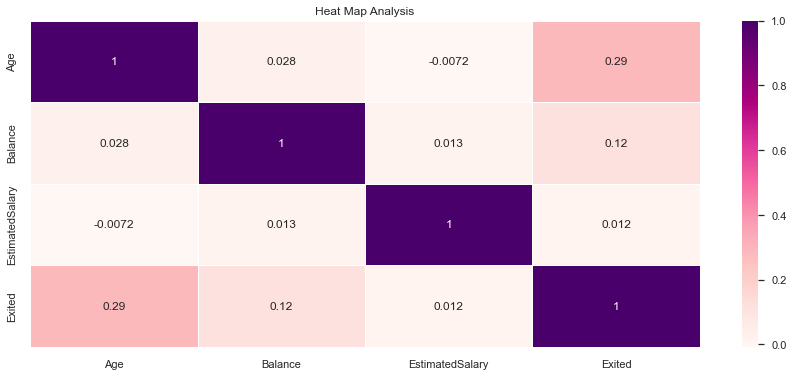

In [363]:
fig,ax=plt.subplots(figsize=(15,6))
sns.heatmap(b_df.corr(),cmap='RdPu',annot=True,linewidth=0.5).set_title('Heat Map Analysis')
plt.show()

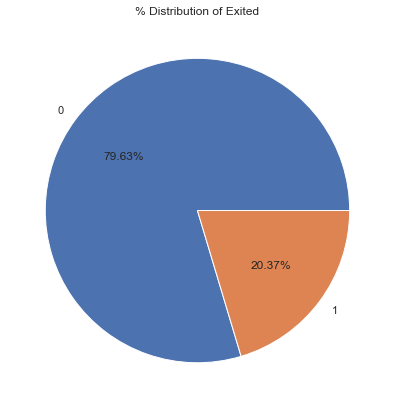

In [271]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.set_title("% Distribution of Exited") 
percentage = b_df["Exited"].value_counts() 
labels = list(b_df["Exited"].value_counts().index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

In [272]:
def bar_percentage(ax,count:len(b_df)):
    for bar in ax.patches:                                            
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  
        x = bar.get_x() + bar.get_width() /2                         
        y = bar.get_height()                                          
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") 
                                                                      
    plt.show()

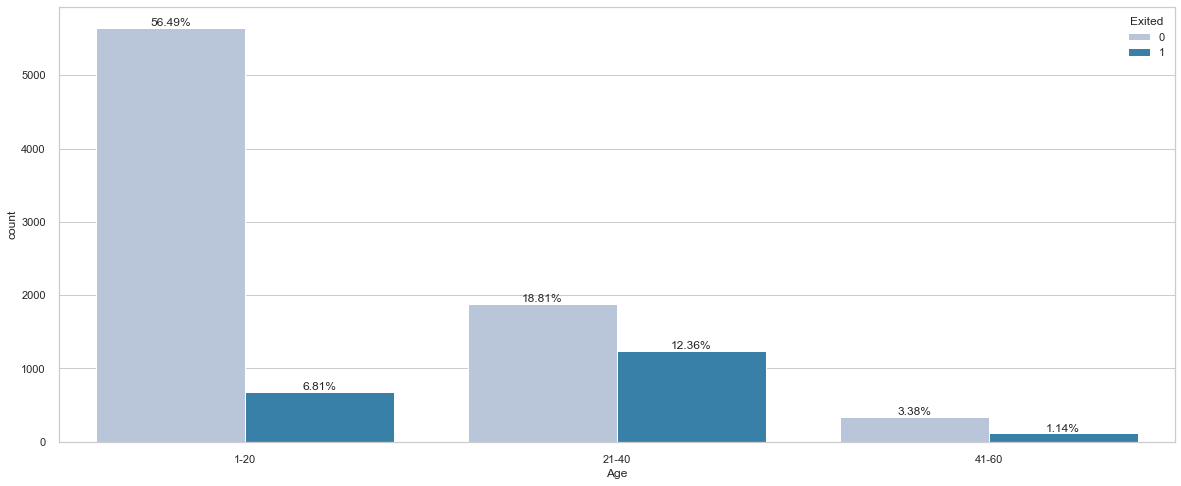

In [273]:
bins=[20,40,60,80]
labels=['1-20','21-40','41-60']
age=pd.cut(b_df['Age'],bins=bins,labels=labels)
age.value_counts()
fig, ax = plt.subplots(figsize = (20,8))
sns.countplot(hue='Exited',x=age,data = b_df,palette="PuBu")
bar_percentage(ax, len(b_df)) 

plt.show()

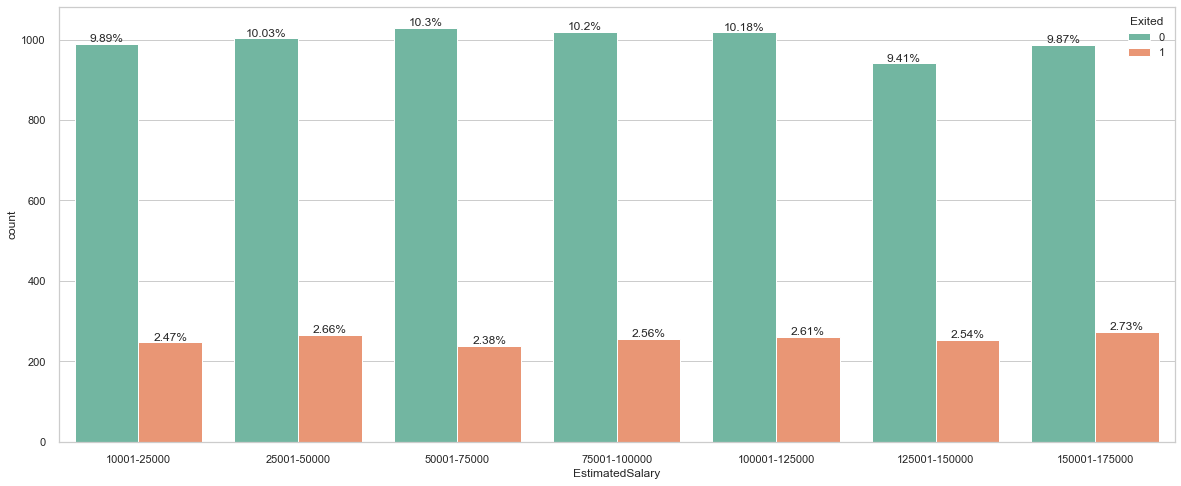

In [274]:
bins=[25000,50000,75000,100000,125000,150000,175000,200000]
labels=['10001-25000','25001-50000','50001-75000','75001-100000','100001-125000','125001-150000','150001-175000']

sal=pd.cut(b_df['EstimatedSalary'],bins=bins,labels=labels)
sal.value_counts()

fig, ax = plt.subplots(figsize = (20,8))
sns.countplot(hue='Exited',x=sal,data = b_df,palette="Set2")
bar_percentage(ax, len(b_df)) 

plt.show()

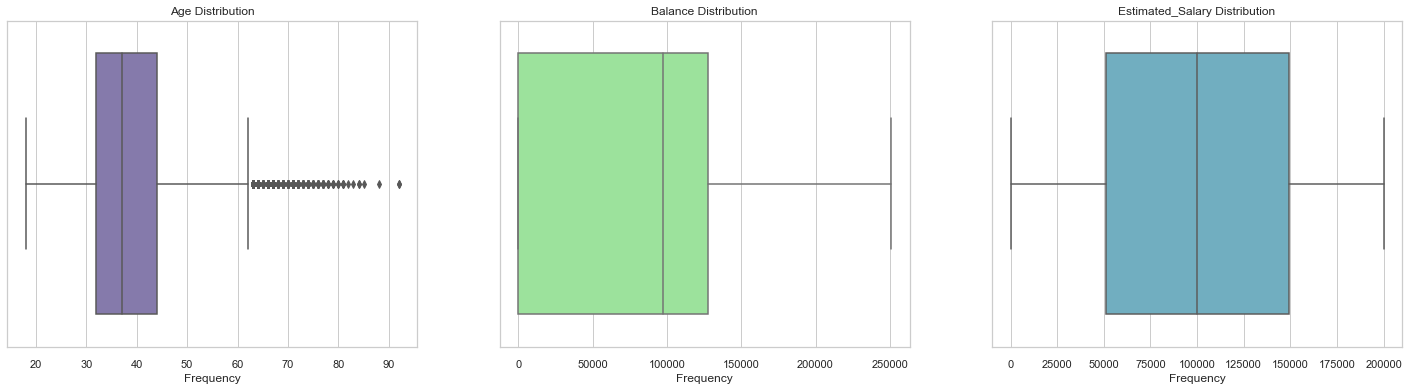

In [275]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Age', data=b_df,color='m')
plt.title('Age Distribution')
plt.xlabel('Frequency')
plt.subplot(1, 3, 2)
sns.boxplot(x='Balance', data=b_df,color='lightgreen')
plt.title('Balance Distribution')
plt.xlabel('Frequency')
plt.subplot(1, 3, 3)
sns.boxplot(x='EstimatedSalary', data=b_df,color='c')
plt.title('Estimated_Salary Distribution')
plt.xlabel('Frequency')
plt.show()

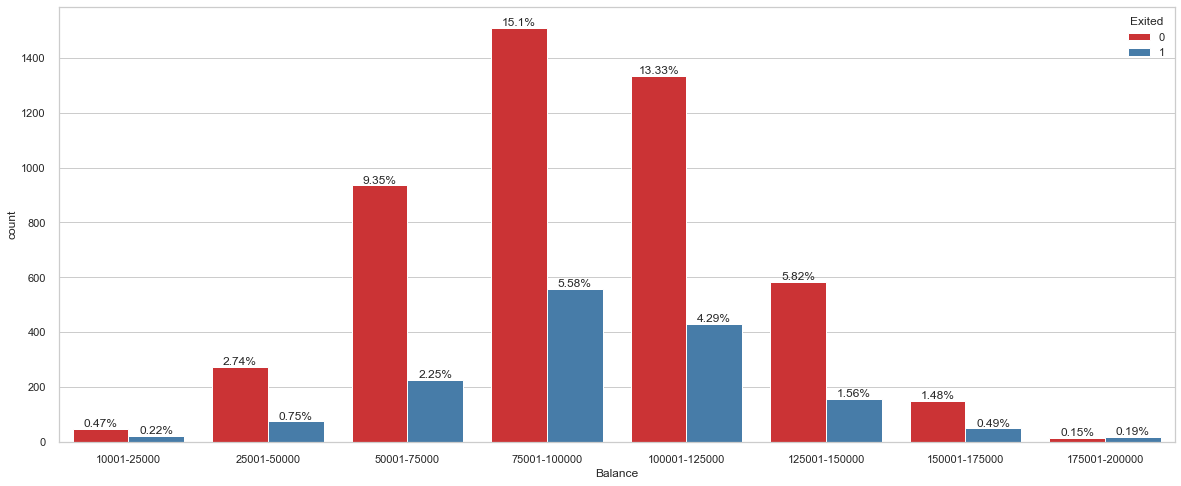

In [276]:
bins=[25000,50000,75000,100000,125000,150000,175000,200000,300000]
labels=['10001-25000','25001-50000','50001-75000','75001-100000','100001-125000','125001-150000','150001-175000','175001-200000']

bal=pd.cut(b_df['Balance'],bins=bins,labels=labels)
bal.value_counts()

fig, ax = plt.subplots(figsize = (20,8))
sns.countplot(hue='Exited',x=bal,data = b_df, palette='Set1')
bar_percentage(ax, len(b_df)) 

plt.show()

## EDA Conclusion

- According to the distribution of Exited column, it can be concluded that only 20.37% of customers churned and 70.63% remained.
- 12.36% chruning was seen with customers of age between 21-40 years.
- It can also be observed that customers with estimated salary between 25000 to 50000 churned out at 2.66%
- Customers with bank balance between 75000-100000 churned out at 5.58%.



## **Data Mining**

In [367]:
X=b_df.drop('Exited', axis=1)
y=b_df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [368]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 3), (3000, 3), (7000,), (3000,))

- **Logistic Regression**

In [280]:
clf_log_reg= LogisticRegression()


cv = KFold(n_splits=5, random_state=42, shuffle = True)
scores_log_reg = cross_val_score(clf_log_reg, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

In [281]:
ac_lr_te = np.mean(scores_log_reg)
print('Accuracy: %.2f' %round((ac_lr_te)*100,2),'%')

Accuracy: 80.53 %


In [282]:
clf_log_reg.fit(X_train,y_train)

LogisticRegression()

In [283]:
pred_log_reg = clf_log_reg.predict(X_test)
pred_log_reg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [284]:
confusion_matrix(y_test,pred_log_reg)

array([[2416,    0],
       [ 584,    0]], dtype=int64)

In [285]:
cr_lr = classification_report(y_test,pred_log_reg)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



In [286]:
roc_lr=roc_auc_score(y_test, clf_log_reg.predict_proba(X_test)[:,1])
auc_lr = roc_auc_score(y_test, pred_log_reg)
print('Roc score for test: %.2f'%round((roc_lr)*100,2),'%')
print('Auc score for test: %.2f'%round((auc_lr)*100,2),'%')


Roc score for test: 46.55 %
Auc score for test: 50.00 %


In [287]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = clf_log_reg.predict_proba(X_test)

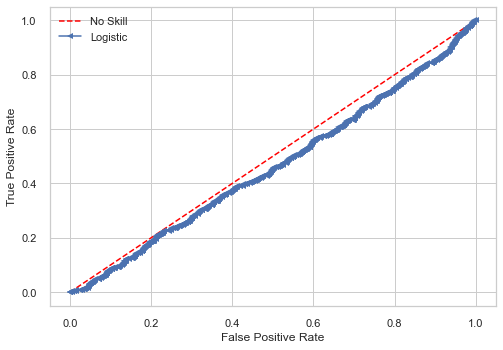

In [288]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs[:,1])

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',color='red')
pyplot.plot(lr_fpr, lr_tpr, marker='<', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

- **KNN Classifier**

In [369]:
def KNN(k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    
    print('when k = ',k , 'or ',round(knn.score(X_test, y_test)*100,2),'%', ";", pred_k)

In [370]:
for i in range(1,21):
    KNN(i)

when k =  1 or  68.2 % ; [0 0 0 ... 0 0 1]
when k =  2 or  78.17 % ; [0 0 0 ... 0 0 0]
when k =  3 or  74.1 % ; [0 0 0 ... 0 0 0]
when k =  4 or  78.77 % ; [0 0 0 ... 0 0 0]
when k =  5 or  77.03 % ; [0 0 0 ... 0 0 1]
when k =  6 or  79.5 % ; [0 0 0 ... 0 0 1]
when k =  7 or  77.87 % ; [0 0 0 ... 0 0 1]
when k =  8 or  79.73 % ; [0 0 0 ... 0 0 1]
when k =  9 or  79.07 % ; [0 0 0 ... 0 0 1]
when k =  10 or  80.1 % ; [0 0 0 ... 0 0 0]
when k =  11 or  79.6 % ; [0 0 0 ... 0 0 1]
when k =  12 or  80.03 % ; [0 0 0 ... 0 0 1]
when k =  13 or  79.7 % ; [0 0 0 ... 0 0 1]
when k =  14 or  79.93 % ; [0 0 0 ... 0 0 0]
when k =  15 or  79.77 % ; [0 0 0 ... 0 0 0]
when k =  16 or  80.0 % ; [0 0 0 ... 0 0 0]
when k =  17 or  79.9 % ; [0 0 0 ... 0 0 0]
when k =  18 or  80.27 % ; [0 0 0 ... 0 0 0]
when k =  19 or  80.17 % ; [0 0 0 ... 0 0 0]
when k =  20 or  80.2 % ; [0 0 0 ... 0 0 0]


In [371]:
knn = KNeighborsClassifier(n_neighbors = 18)

cv1 = KFold(n_splits=5, random_state=42, shuffle = True)
scores_knn = cross_val_score(knn, X_test, y_test, scoring='accuracy', cv=cv1, n_jobs=-1)

In [372]:
ac_knn_te = np.mean(scores_knn)
print('Accuracy: %.2f' %round((ac_knn_te)*100,2),'%')

Accuracy: 80.50 %


In [373]:
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [374]:
confusion_matrix(y_test,pred_knn)

array([[2403,   13],
       [ 579,    5]], dtype=int64)

In [375]:
cr_knn = classification_report(y_test,pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2416
           1       0.28      0.01      0.02       584

    accuracy                           0.80      3000
   macro avg       0.54      0.50      0.45      3000
weighted avg       0.70      0.80      0.72      3000



In [376]:
roc_knn=roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
auc_knn = roc_auc_score(y_test, pred_knn)
print('Roc score for test: %.2f'%round((roc_knn)*100,2),'%')
print('Auc score for test: %.2f'%round((auc_knn)*100,2),'%')

Roc score for test: 54.39 %
Auc score for test: 50.16 %


In [377]:
ns_probs_k = [0 for _ in range(len(y_test))]
kn_probs = knn.predict_proba(X_test)

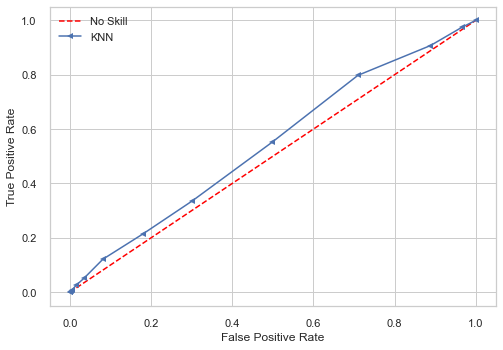

In [378]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs_k)
lr_fpr, lr_tpr, _ = roc_curve(y_test, kn_probs[:,1])

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',color='red')
pyplot.plot(lr_fpr, lr_tpr, marker='<', label='KNN')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

- **Gaussian Naive Bayes**

In [299]:
gnb = GaussianNB()

cv2 = KFold(n_splits=5, random_state=42, shuffle = True)
scores_gnb = cross_val_score(gnb, X_test, y_test, scoring='accuracy', cv=cv2, n_jobs=-1)

In [300]:
ac_gnb_te = np.mean(scores_gnb)
print('Accuracy: %.2f' %round((ac_gnb_te)*100,2),'%')

Accuracy: 78.87 %


In [301]:
gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)
pred_gnb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [302]:
confusion_matrix(y_test,pred_gnb)

array([[2326,   90],
       [ 543,   41]], dtype=int64)

In [303]:
cr_gnb = classification_report(y_test,pred_gnb)
print(cr_gnb)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2416
           1       0.31      0.07      0.11       584

    accuracy                           0.79      3000
   macro avg       0.56      0.52      0.50      3000
weighted avg       0.71      0.79      0.73      3000



In [304]:
roc_gnb=roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1])
auc_gnb = roc_auc_score(y_test, pred_gnb)
print('Roc score for test: %.2f'%round((roc_gnb)*100,2),'%')
print('Auc score for test: %.2f'%round((auc_gnb)*100,2),'%')

Roc score for test: 73.94 %
Auc score for test: 51.65 %


In [305]:
ns_probs_g = [0 for _ in range(len(y_test))]
gnb_probs = gnb.predict_proba(X_test)

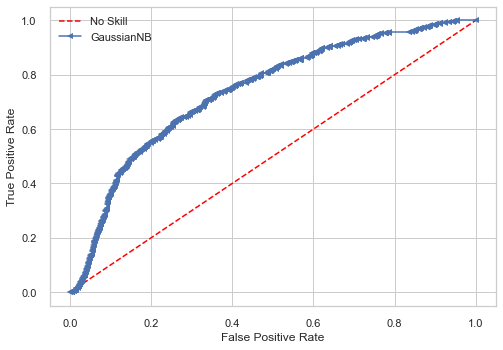

In [306]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs_g)
lr_fpr, lr_tpr, _ = roc_curve(y_test, gnb_probs[:,1])

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',color='red')
pyplot.plot(lr_fpr, lr_tpr, marker='<', label='GaussianNB')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

- **Decision Tree Classifier**

In [307]:
dtc = DecisionTreeClassifier()

cv3 = KFold(n_splits=5, random_state=42, shuffle = True)
scores_dtc = cross_val_score(dtc, X_test, y_test, scoring='accuracy', cv=cv3, n_jobs=-1)

In [308]:
ac_dtc_te = np.mean(scores_dtc)
print('Accuracy: %.2f' %round((ac_dtc_te)*100,2),'%')

Accuracy: 73.20 %


In [309]:
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
pred_dtc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [310]:
confusion_matrix(y_test,pred_dtc)

array([[1971,  445],
       [ 394,  190]], dtype=int64)

In [311]:
cr_dtc = classification_report(y_test,pred_dtc)
print(cr_dtc)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2416
           1       0.30      0.33      0.31       584

    accuracy                           0.72      3000
   macro avg       0.57      0.57      0.57      3000
weighted avg       0.73      0.72      0.72      3000



In [312]:
roc_dtc=roc_auc_score(y_test, dtc.predict_proba(X_test)[:,1])
auc_dtc = roc_auc_score(y_test, pred_dtc)
print('Roc score for test: %.2f'%round((roc_dtc)*100,2),'%')
print('Auc score for test: %.2f'%round((auc_dtc)*100,2),'%')

Roc score for test: 57.06 %
Auc score for test: 57.06 %


In [313]:
ns_probs_dt = [0 for _ in range(len(y_test))]
dt_probs = dtc.predict_proba(X_test)

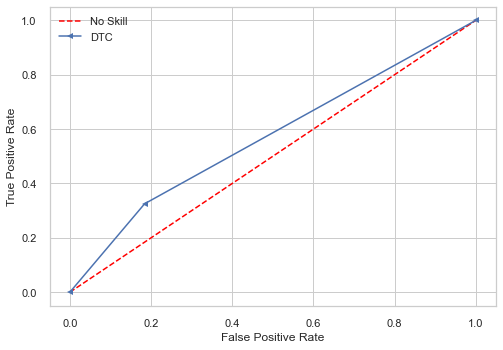

In [314]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs_dt)
lr_fpr, lr_tpr, _ = roc_curve(y_test, dt_probs[:,1])

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',color='red')
pyplot.plot(lr_fpr, lr_tpr, marker='<', label='DTC')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

- **Random Forest Classifier**

In [315]:
rfc = RandomForestClassifier()

cv4 = KFold(n_splits=5, random_state=42, shuffle = True)
scores_rfc = cross_val_score(rfc, X_test, y_test, scoring='accuracy', cv=cv4, n_jobs=-1)

In [316]:
ac_rfc_te = np.mean(scores_rfc)
print('Accuracy: %.2f' %round((ac_rfc_te)*100,2),'%')

Accuracy: 78.27 %


In [317]:
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
pred_rfc

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [318]:
confusion_matrix(y_test,pred_rfc)

array([[2191,  225],
       [ 414,  170]], dtype=int64)

In [319]:
cr_rfc = classification_report(y_test,pred_rfc)
print(cr_rfc)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2416
           1       0.43      0.29      0.35       584

    accuracy                           0.79      3000
   macro avg       0.64      0.60      0.61      3000
weighted avg       0.76      0.79      0.77      3000



In [320]:
roc_rfc=roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])
auc_rfc = roc_auc_score(y_test, pred_rfc)
print('Roc score for test: %.2f'%round((roc_rfc)*100,2),'%')
print('Auc score for test: %.2f'%round((auc_rfc)*100,2),'%')

Roc score for test: 70.64 %
Auc score for test: 59.90 %


In [321]:
ns_probs_rf = [0 for _ in range(len(y_test))]
rf_probs = rfc.predict_proba(X_test)

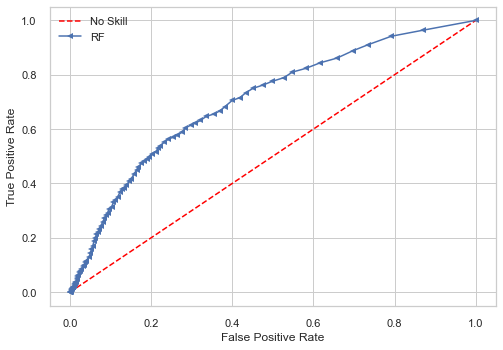

In [322]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs_rf)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_probs[:,1])

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',color='red')
pyplot.plot(lr_fpr, lr_tpr, marker='<', label='RF')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [323]:
abc = AdaBoostClassifier()

cv5 = KFold(n_splits=5,random_state=42,shuffle=True)
scores_abc = cross_val_score(abc, X_test, y_test, scoring='accuracy', cv=cv5, n_jobs=-1)

In [324]:
ac_abc_te = np.mean(scores_abc)
print('Accuracy: %.2f' %round((ac_abc_te)*100,2),'%')

Accuracy: 80.93 %


In [325]:
abc.fit(X_train, y_train)
pred_abc = abc.predict(X_test)
pred_abc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [326]:
confusion_matrix(y_test,pred_abc)

array([[2247,  169],
       [ 385,  199]], dtype=int64)

In [327]:
cr_abc = classification_report(y_test,pred_abc)
print(cr_abc)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2416
           1       0.54      0.34      0.42       584

    accuracy                           0.82      3000
   macro avg       0.70      0.64      0.65      3000
weighted avg       0.79      0.82      0.80      3000



In [328]:
roc_abc=roc_auc_score(y_test, abc.predict_proba(X_test)[:,1])
auc_abc = roc_auc_score(y_test, pred_abc)
print('Roc score for test: %.2f'%round((roc_abc)*100,2),'%')
print('Auc score for test: %.2f'%round((auc_abc)*100,2),'%')

Roc score for test: 76.01 %
Auc score for test: 63.54 %


In [329]:
ns_probs_abc = [0 for _ in range(len(y_test))]
abc_probs = abc.predict_proba(X_test)

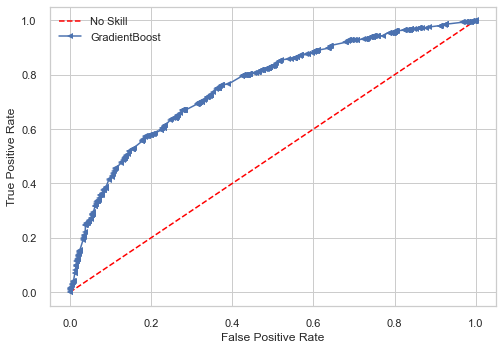

In [330]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs_abc)
lr_fpr, lr_tpr, _ = roc_curve(y_test, abc_probs[:,1])

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',color='red')
pyplot.plot(lr_fpr, lr_tpr, marker='<', label='GradientBoost')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

- **Comparing Results**

In [379]:
model_result = [['ACCURACY',ac_lr_te, ac_knn_te, ac_gnb_te, ac_dtc_te, ac_rfc_te, ac_abc_te],
                ['ROC', roc_lr, roc_knn, roc_gnb, roc_dtc, roc_rfc, roc_abc],
                ['AUC', auc_lr, auc_knn, auc_gnb, auc_dtc,auc_rfc, auc_abc]]

In [380]:
score = pd.DataFrame(model_result, columns=['Scores','Log_Reg','KNN','GaussianNB','Decision_Tree','Random_Forest','AdaBoost'])
score

,Scores,Log_Reg,KNN,GaussianNB,Decision_Tree,Random_Forest,AdaBoost
0,ACCURACY,0.805333,0.805000,0.788667,0.732000,0.782667,0.809333
1,ROC,0.465459,0.543877,0.739362,0.570577,0.706368,0.760092
2,AUC,0.500000,0.501590,0.516477,0.570577,0.598983,0.635402


- **Predictions based on AdaBoost Classifier**

In [354]:
X_test = b_df.drop(columns=['Exited'])

In [355]:
pred = abc.predict(X_test)

predictions = b_df.copy()
predictions['Churn_Pred'] = pred


In [356]:
pred_probs = abc.predict_proba(X_test)[:,1]

predictions = predictions.copy()
predictions['Churn_Pred_Prob'] = pred_probs

predictions.head(45)

,Age,Balance,EstimatedSalary,Exited,Churn_Pred,Churn_Pred_Prob
0,42,0.00,101348.88,1,0,0.491313
1,41,83807.86,112542.58,0,0,0.493460
2,42,159660.80,113931.57,1,0,0.494105
3,39,0.00,93826.63,0,0,0.488945
4,43,125510.82,79084.10,0,0,0.495281
5,44,113755.78,149756.71,1,0,0.495281
6,50,0.00,10062.80,0,1,0.500437
7,29,115046.74,119346.88,1,0,0.488707
8,44,142051.07,74940.50,0,0,0.494105
9,27,134603.88,71725.73,0,0,0.489143


In [357]:
#predictions.to_csv('Churn_Predictions.csv')

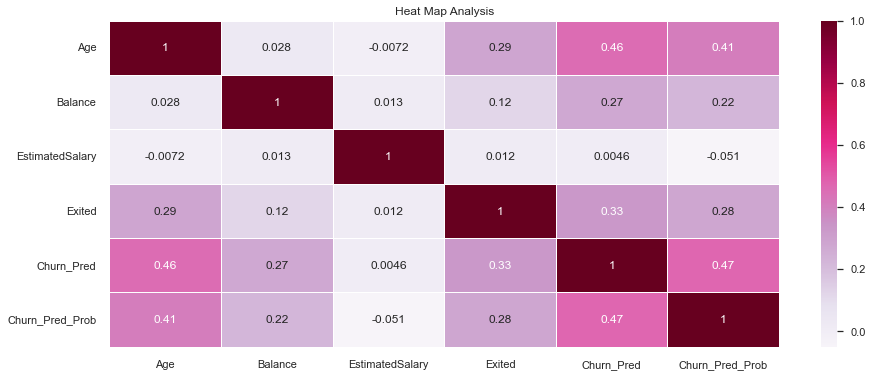

In [358]:
fig,ax=plt.subplots(figsize=(15,6))
sns.heatmap(predictions.corr(),cmap='PuRd',annot=True,linewidth=0.5).set_title('Heat Map Analysis')
plt.show()

In [359]:
def bar_percentage(ax,count:len(predictions)):
    for bar in ax.patches:                                            
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  
        x = bar.get_x() + bar.get_width() /2                         
        y = bar.get_height()                                          
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") 
                                                                      
    plt.show()

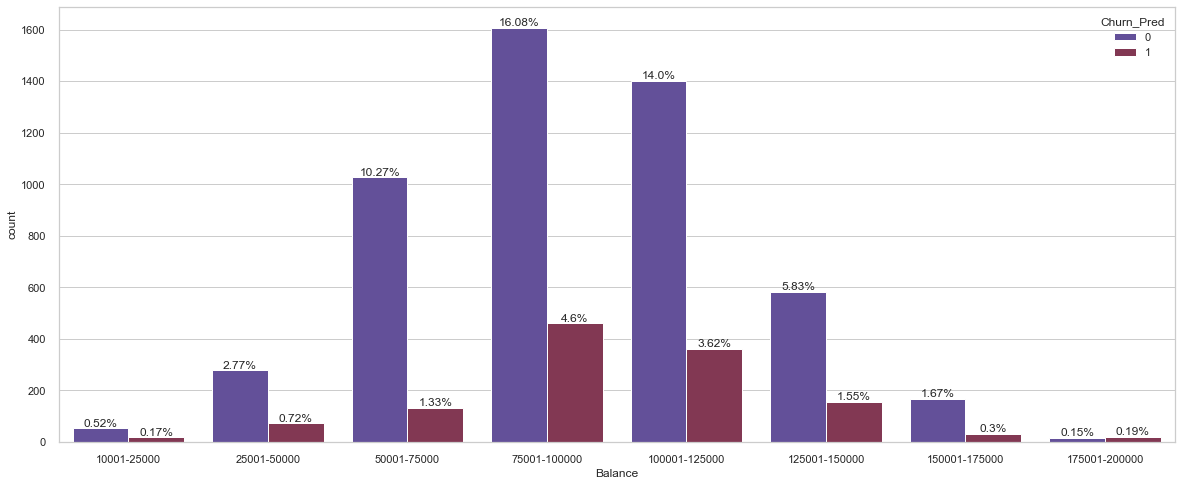

In [360]:
bins=[25000,50000,75000,100000,125000,150000,175000,200000,300000]
labels=['10001-25000','25001-50000','50001-75000','75001-100000','100001-125000','125001-150000','150001-175000','175001-200000']

balance=pd.cut(predictions['Balance'],bins=bins,labels=labels)
balance.value_counts()

fig, ax = plt.subplots(figsize = (20,8))
sns.countplot(hue='Churn_Pred',x=balance,data = predictions, palette='twilight')
bar_percentage(ax, len(predictions))

plt.show()

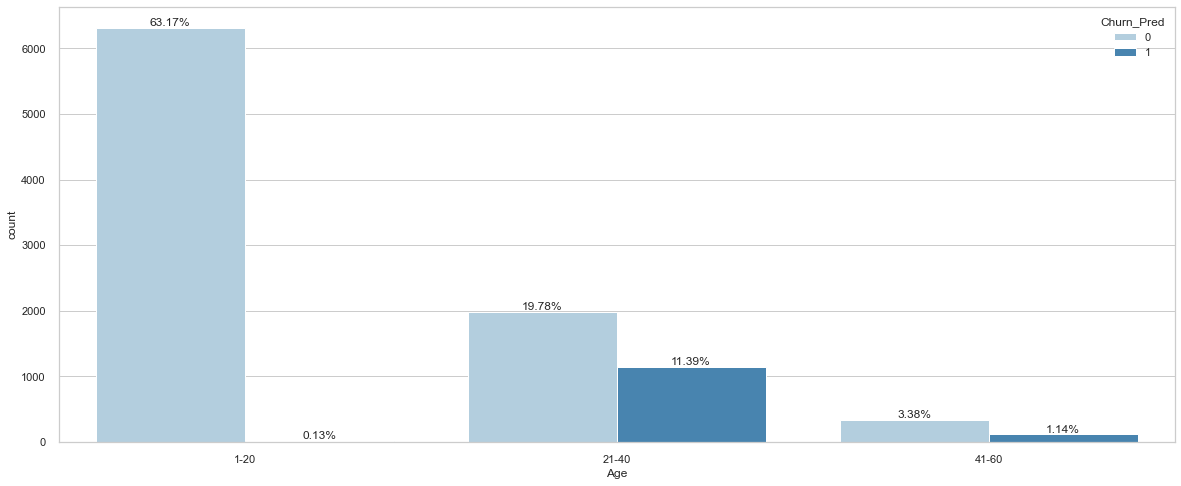

In [361]:
bins=[20,40,60,80]
labels=['1-20','21-40','41-60']

a=pd.cut(predictions['Age'],bins=bins,labels=labels)
a.value_counts()

fig, ax = plt.subplots(figsize = (20,8))
sns.countplot(hue='Churn_Pred',x=a,data = predictions,palette="Blues")
bar_percentage(ax, len(predictions)) 

plt.show()

# $$\;\;\;\; Final \ Conclusion $$

- Among all the Classification algorithms **AdaBoost Classifier** is best fit to the model, as it has high **Accuracy(80.93%)**,**ROC(76.0%)** and **AUC scores(63.54%)**.

- According to the feature importance graph **EstimatedSalary** was high followed by **Age** and **Balance**.

- However, **Churn_Pred** and **Churn_Pred_Prob** had most **correlation** with **Age**,and **Balance**.

- **11.39%** chruning is predicted with customers of age between **21-40 years** in the final graph of **Age** w.r.t **Churn_Pred**.

- The final graph of Balance w.r.t. Churn_Pred interprets that customers with bank balance between **75000-100000** may **churn out** at **4.6%**.

##### Preventive Measures to be taken to reduce churning:
- Focusing on best customers
- Customer satisfaction
- Reasonable offers to attract customers
- Focusing on mending problematic areas